In [4]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Read the csv file into a pandas DataFrame
data = pd.read_csv('data.csv')
data.head()

,Age,Race,Sex,Stroke,A-fib/A-flutter,CAD,Carotid stenosis,CKD,DM,DM/ CKD,...,Overweight,PE,Previous MI,Previous Stroke,Previous Stroke/ Previous TIA,Prosthetic Heart Valve,PVD,Sickle Cell Disorder,Sleep Apnea,Smoker
0,105,HI,F,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,104,HI,F,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,104,CA,F,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,104,CA,F,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,103,CA,F,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
#Convert categorical data into dummy data 
data = pd.get_dummies(data)
data.head()

,Age,Stroke,A-fib/A-flutter,CAD,Carotid stenosis,CKD,DM,DM/ CKD,DM/ PVD,Drugs/Alcohol Abuse,...,Race_AS,Race_BL,Race_CA,Race_HI,Race_NH,Race_OT,Race_PI,Race_UNK,Sex_F,Sex_M
0,105,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,104,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,104,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,104,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,103,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [7]:
#all dataframe columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24201 entries, 0 to 24200
Data columns (total 43 columns):
Age                              24201 non-null int64
Stroke                           24201 non-null int64
A-fib/A-flutter                  24201 non-null int64
CAD                              24201 non-null int64
Carotid stenosis                 24201 non-null int64
CKD                              24201 non-null int64
DM                               24201 non-null int64
DM/ CKD                          24201 non-null int64
DM/ PVD                          24201 non-null int64
Drugs/Alcohol Abuse              24201 non-null int64
DVT                              24201 non-null int64
Dyslipidemia                     24201 non-null int64
Familial hypercholesterolemia    24201 non-null int64
Family History of Stroke         24201 non-null int64
HF                               24201 non-null int64
HRT                              24201 non-null int64
HTN                        

In [8]:
#define X and y

X = data[['Age','Race_AI', 'Race_AS', 'Race_BL', 'Race_CA', 'Race_HI', 'Race_NH', 'Race_OT', 'Race_PI', 'Race_UNK', 'Sex_F', 'Sex_M', 'HTN', 'Dyslipidemia', 'Carotid stenosis', 'CKD', 'DM']]
y = data["Stroke"].values.reshape(-1, 1)
print(X.shape, y.shape)

(24201, 17) (24201, 1)


In [10]:
#display columns of X 
X.columns

Index(['Age', 'Race_AI', 'Race_AS', 'Race_BL', 'Race_CA', 'Race_HI', 'Race_NH',
       'Race_OT', 'Race_PI', 'Race_UNK', 'Sex_F', 'Sex_M', 'HTN',
       'Dyslipidemia', 'Carotid stenosis', 'CKD', 'DM'],
      dtype='object')

In [12]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [13]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


In [15]:
X_train_scaled

array([[ 0.67229076, -0.04519659, -0.30964841, ..., -0.08942782,
        -0.52502728, -0.53176702],
       [ 0.67229076, -0.04519659, -0.30964841, ..., -0.08942782,
         1.90466295, -0.53176702],
       [ 0.04432385, -0.04519659, -0.30964841, ..., -0.08942782,
        -0.52502728, -0.53176702],
       ...,
       [ 1.35258825, -0.04519659, -0.30964841, ..., -0.08942782,
        -0.52502728, -0.53176702],
       [ 0.61996019, -0.04519659, -0.30964841, ..., -0.08942782,
        -0.52502728, -0.53176702],
       [-1.89190745, -0.04519659, -0.30964841, ..., -0.08942782,
        -0.52502728, -0.53176702]])

Logistic Regression

In [16]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#fit the data
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#validate the model using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9734986225895317
Testing Data Score: 0.9730623037514461


In [19]:
# test logistic model to predict Stroke/No Stroke fo 55 yr old caucasian male with no conditions
new_data = np.array([[55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0]])
predictions = classifier.predict(new_data)
print("Classes are either 0 (No Stroke) or 1 (Stroke)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (No Stroke) or 1 (Stroke)
The new point was classified as: [0]


In [24]:
# test logistic model to predict Stroke/No Stroke for 55 yr old caucasian male with all conditions
new_data = np.array([[55,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1]])
predictions = classifier.predict(new_data)
print("Classes are either 0 (No Stroke) or 1 (Stroke)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (No Stroke) or 1 (Stroke)
The new point was classified as: [1]


In [ ]:
Testing Linear Regression

In [32]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

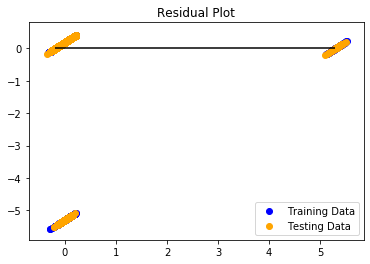

In [33]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [34]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7801591921465295, R2: 0.21119331026231192


Neaural network with 1 layer

In [35]:
from tensorflow.keras.utils import to_categorical

In [36]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [41]:
#create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=17))
model.add(Dense(units=2, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 108       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 14        
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 18150 samples
Epoch 1/100
18150/18150 - 1s - loss: 0.2351 - accuracy: 0.9469
Epoch 2/100
18150/18150 - 0s - loss: 0.1240 - accuracy: 0.9734
Epoch 3/100
18150/18150 - 0s - loss: 0.1205 - accuracy: 0.9735
Epoch 4/100
18150/18150 - 0s - loss: 0.1190 - accuracy: 0.9735
Epoch 5/100
18150/18150 - 0s - loss: 0.1182 - accuracy: 0.9735
Epoch 6/100
18150/18150 - 0s - loss: 0.1176 - accuracy: 0.9735
Epoch 7/100
18150/18150 - 0s - loss: 0.1171 - accuracy: 0.9735
Epoch 8/100
18150/18150 - 0s - loss: 0.1168 - accuracy: 0.9735
Epoch 9/100
18150/18150 - 0s - loss: 0.1166 - accuracy: 0.9735
Epoch 10/100
18150/18150 - 0s - loss: 0.1163 - accuracy: 0.9735
Epoch 11/100
18150/18150 - 0s - loss: 0.1160 - accuracy: 0.9735
Epoch 12/100
18150/18150 - 0s - loss: 0.1158 - accuracy: 0.9735
Epoch 13/100
18150/18150 - 0s - loss: 0.1157 - accuracy: 0.9735
Epoch 14/100
18150/18150 - 0s - loss: 0.1157 - accuracy: 0.9735
Epoch 15/100
18150/18150 - 0s - loss: 0.1155 - accuracy: 0.9735
Epoch 16/100
18150/18150 -

Deep Learning Neaural network with 2 hidden layers

In [46]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=17))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [47]:
deep_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 108       
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 14        
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________


In [48]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 18150 samples
Epoch 1/100
18150/18150 - 1s - loss: 0.2029 - accuracy: 0.9640
Epoch 2/100
18150/18150 - 0s - loss: 0.1381 - accuracy: 0.9656
Epoch 3/100
18150/18150 - 0s - loss: 0.1250 - accuracy: 0.9702
Epoch 4/100
18150/18150 - 0s - loss: 0.1194 - accuracy: 0.9734
Epoch 5/100
18150/18150 - 0s - loss: 0.1179 - accuracy: 0.9735
Epoch 6/100
18150/18150 - 1s - loss: 0.1172 - accuracy: 0.9735
Epoch 7/100
18150/18150 - 0s - loss: 0.1169 - accuracy: 0.9735
Epoch 8/100
18150/18150 - 0s - loss: 0.1166 - accuracy: 0.9735
Epoch 9/100
18150/18150 - 0s - loss: 0.1163 - accuracy: 0.9735
Epoch 10/100
18150/18150 - 0s - loss: 0.1162 - accuracy: 0.9735
Epoch 11/100
18150/18150 - 0s - loss: 0.1160 - accuracy: 0.9735
Epoch 12/100
18150/18150 - 0s - loss: 0.1159 - accuracy: 0.9735
Epoch 13/100
18150/18150 - 0s - loss: 0.1158 - accuracy: 0.9735
Epoch 14/100
18150/18150 - 1s - loss: 0.1158 - accuracy: 0.9735
Epoch 15/100
18150/18150 - 0s - loss: 0.1157 - accuracy: 0.9735
Epoch 16/100
18150/18150 -

In [49]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

6051/6051 - 0s - loss: 0.1182 - accuracy: 0.9731
Normal Neural Network - Loss: 0.11817801571302602, Accuracy: 0.97306227684021


In [50]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

6051/6051 - 0s - loss: 0.1187 - accuracy: 0.9729
Deep Neural Network - Loss: 0.1186513167426884, Accuracy: 0.9728970527648926
